<a href="https://colab.research.google.com/github/ccrsypherd/FoxFarm/blob/main/Final_OriginalData_NoRFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Initialize ###

!pip install nilearn
import warnings
from nilearn.connectome import ConnectivityMeasure
# ignore the warning message from nilearn
warnings.filterwarnings("ignore", category=FutureWarning)

import torch
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from nilearn.connectome import ConnectivityMeasure
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Mount Google Drive
drive.mount('/content/gdrive')

# Define the paths to the data folders
data_dir = '/content/gdrive/MyDrive/ds18/smalldense/'
class_folders = os.listdir(data_dir)

# Initialize empty lists for data and labels
data = []
labels = []

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 57.8 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2
Mounted at /content/gdrive


In [2]:
### Load Original Data and Labels ###

# Loop over the class folders
for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(data_dir, class_folder)
    file_names = os.listdir(class_path)
    
    # Loop over the files in the class folder
    for file_name in file_names:
        if file_name.endswith('.dot'):
            file_path = os.path.join(class_path, file_name)
            with open(file_path, 'r') as f:
                file_contents = np.load(file_path)
                # Append the file contents to the data list
                data.append(file_contents)
                # Append the class label to the labels list
                labels.append(i)
# Convert the data and labels to numpy arrays
data = np.array(data)
print(data.shape)
labels = np.array(labels)
print(labels)

# Flatten each correlation matrix into a one-dimensional array
feature_vectors = data.reshape(data.shape[0], -1)
print(feature_vectors.shape)
del data

(30, 3001, 3001)
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
(30, 9006001)


In [3]:
#### Apply SVM Directly to the Flattened Matrices of 900301 ###

# Define kernel values to loop over
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Define number of iterations
num_iterations = 10

# Initialize results array
results = np.zeros((num_iterations, 5))

# Loop over different kernel values
for kernel in kernels:
    # Loop over iterations
    for i in range(num_iterations):

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(feature_vectors, labels, test_size=0.2)

        # Train SVM classifier
        svm = SVC(kernel=kernel)

        # Fit model and make predictions
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)

        # Calculate metrics and store in results array
        results[i][0] = accuracy_score(y_train, svm.predict(X_train))
        results[i][1] = accuracy_score(y_test, y_pred)
        results[i][2] = precision_score(y_test, y_pred, average='macro')
        results[i][3] = recall_score(y_test, y_pred, average='macro')
        results[i][4] = f1_score(y_test, y_pred, average='macro')

    # Print results for each kernel
    print(f'Kernel: {kernel}')
    print(f'{"Training Accuracy":<10} {"Testing Accuracy":<10} {"Precision":<10} {"Recall":<10} {"F1 Score":<10}')
    for i in range(num_iterations):
        print(f'{results[i][0]:<10.3f} {results[i][1]:<10.3f} {results[i][2]:<10.3f} {results[i][3]:<10.3f} {results[i][4]:<10.3f}')
    print(f'Mean:      {np.mean(results[:, 0]):<10.3f} {np.mean(results[:, 1]):<10.3f} {np.mean(results[:, 2]):<10.3f} {np.mean(results[:, 3]):<10.3f} {np.mean(results[:, 4]):<10.3f}')
    print('-------------------------------------------------------')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Kernel: linear
Training Accuracy Testing Accuracy Precision  Recall     F1 Score  
1.000      0.500      0.444      0.556      0.433     
1.000      0.500      0.333      0.667      0.433     
1.000      0.667      0.778      0.778      0.667     
1.000      0.500      0.333      0.667      0.433     
1.000      0.667      0.778      0.722      0.656     
1.000      0.333      0.444      0.444      0.333     
1.000      0.333      0.500      0.250      0.300     
1.000      0.833      0.583      0.667      0.619     
1.000      0.500      0.389      0.389      0.389     
1.000      0.500      0.611      0.611      0.500     
Mean:      1.000      0.533      0.519      0.575      0.476     
-------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Kernel: poly
Training Accuracy Testing Accuracy Precision  Recall     F1 Score  
0.750      0.333      0.400      0.417      0.244     
0.667      0.167      0.056      0.333      0.095     
0.667      0.167      0.056      0.333      0.095     
0.708      0.500      0.467      0.500      0.413     
0.708      0.167      0.083      0.500      0.143     
0.708      0.167      0.333      0.111      0.167     
0.750      0.333      0.250      0.667      0.356     
0.792      0.167      0.056      0.333      0.095     
0.750      0.500      0.167      0.333      0.222     
0.667      0.333      0.400      0.667      0.444     
Mean:      0.717      0.283      0.227      0.419      0.227     
-------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Kernel: rbf
Training Accuracy Testing Accuracy Precision  Recall     F1 Score  
0.833      0.167      0.167      0.111      0.133     
0.875      0.333      0.400      0.500      0.333     
0.917      0.500      0.467      0.500      0.413     
0.792      0.000      0.000      0.000      0.000     
0.875      0.167      0.333      0.111      0.167     
0.917      0.333      0.400      0.667      0.444     
0.750      0.333      0.222      0.500      0.300     
0.750      0.000      0.000      0.000      0.000     
0.875      0.333      0.400      0.444      0.278     
0.792      0.333      0.250      0.444      0.267     
Mean:      0.838      0.250      0.264      0.328      0.233     
-------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Kernel: sigmoid
Training Accuracy Testing Accuracy Precision  Recall     F1 Score  
0.750      0.167      0.067      0.333      0.111     
0.708      0.167      0.167      0.167      0.167     
0.792      0.000      0.000      0.000      0.000     
0.708      0.333      0.250      0.667      0.356     
0.667      0.333      0.167      0.222      0.190     
0.583      0.167      0.056      0.333      0.095     
0.667      0.333      0.250      0.500      0.300     
0.750      0.167      0.111      0.111      0.111     
0.667      0.167      0.333      0.333      0.333     
0.833      0.500      0.467      0.500      0.413     
Mean:      0.713      0.233      0.187      0.317      0.208     
-------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kernel: linear
Perplexity: 5
Mean:      0.342      0.167     
-------------------------------------------------------
Kernel: poly
Perplexity: 5
Mean:      0.321      0.167     
-------------------------------------------------------
Kernel: rbf
Perplexity: 5
Mean:      0.325      0.167     
-------------------------------------------------------
Kernel: sigmoid
Perplexity: 5
Mean:      0.300      0.233     
-------------------------------------------------------
Kernel: linear
Perplexity: 10
Mean:      0.371      0.183     
-------------------------------------------------------
Kernel: poly
Perplexity: 10
Mean:      0.346      0.217     
-------------------------------------------------------
Kernel: rbf
Perplexity: 10
Mean:      0.383      0.183     
-------------------------------------------------------
Kernel: sigmoid
Perplexity: 10
Mean:      0.358      0.167     
-------------------------------------------------------
Kernel: linear
Perplexity: 15
Mean:      0.392      0.133   

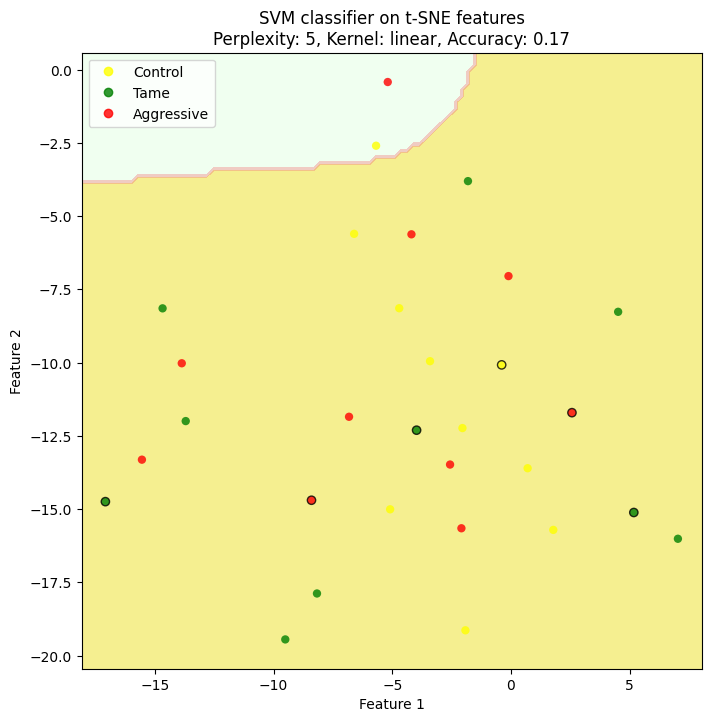

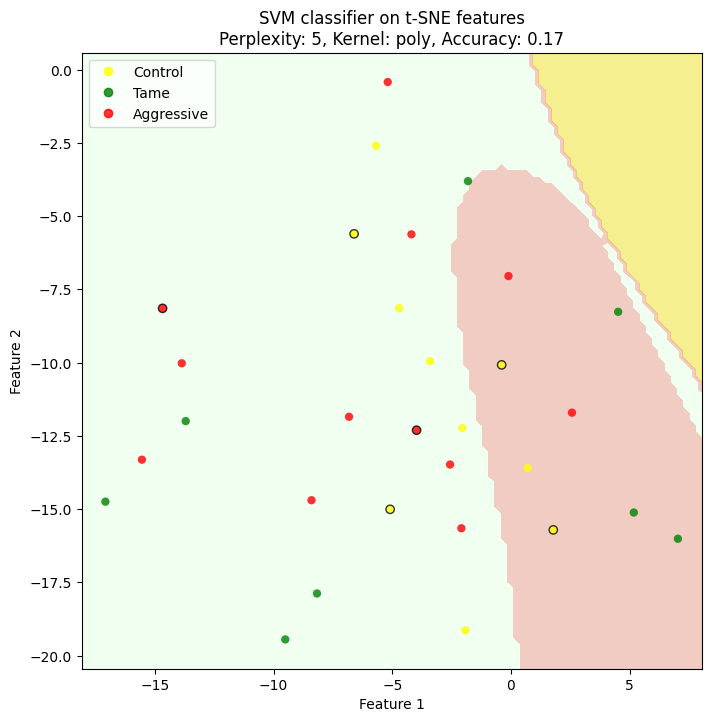

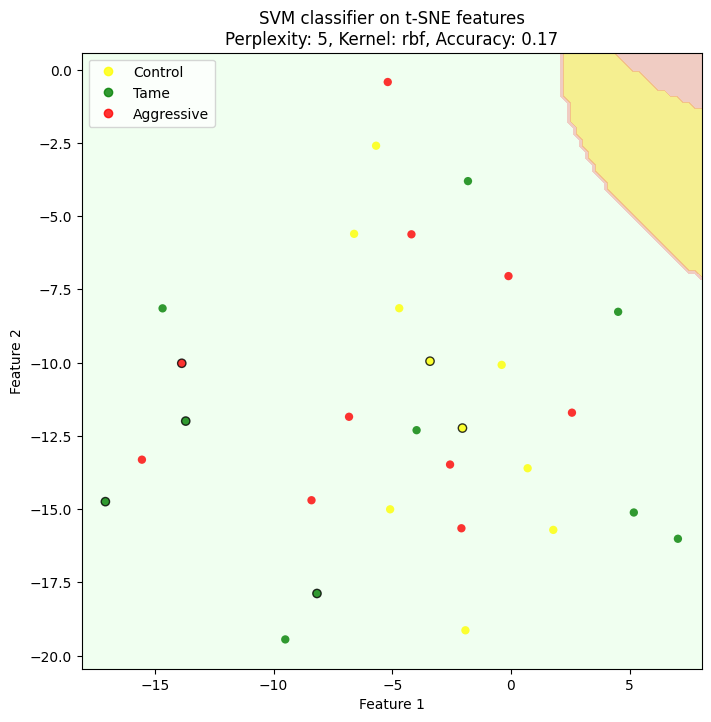

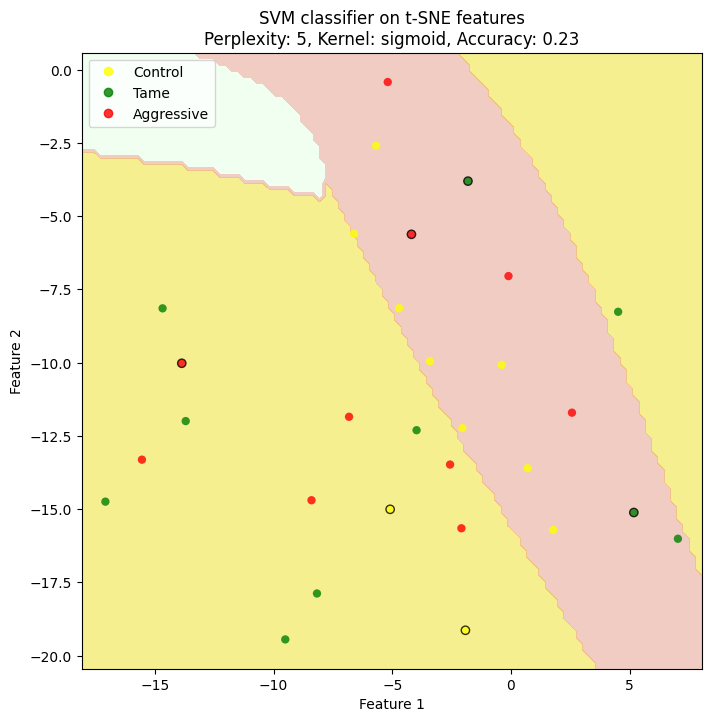

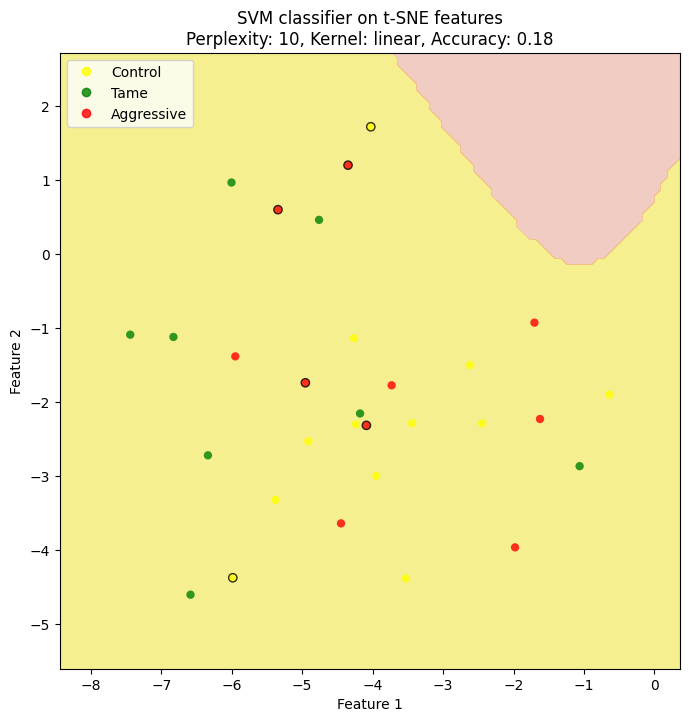

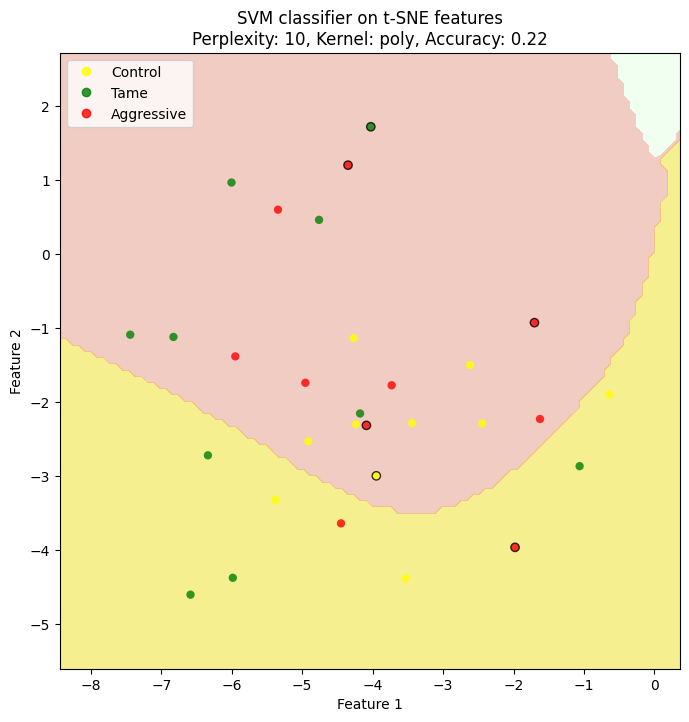

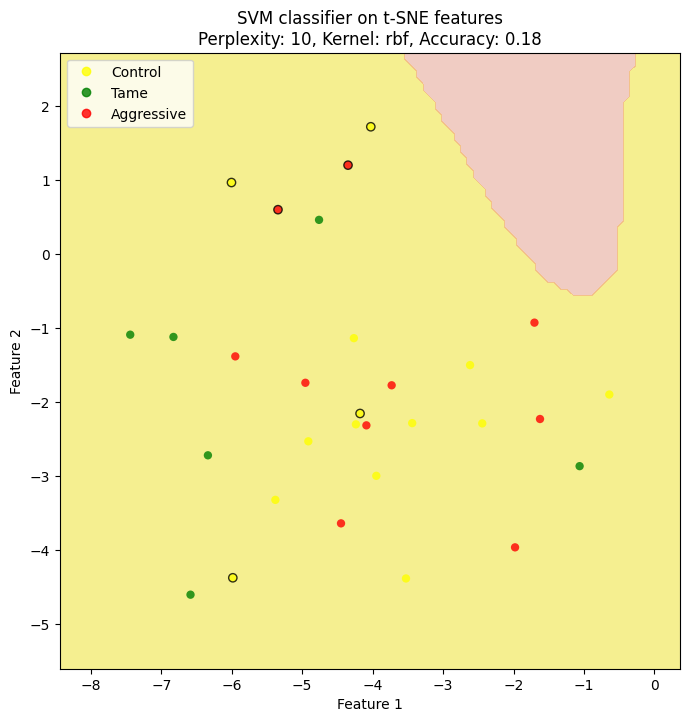

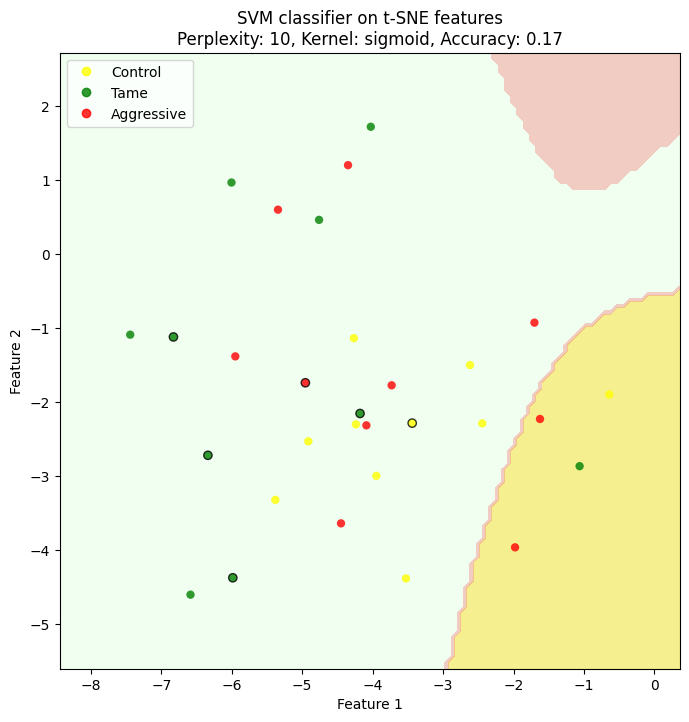

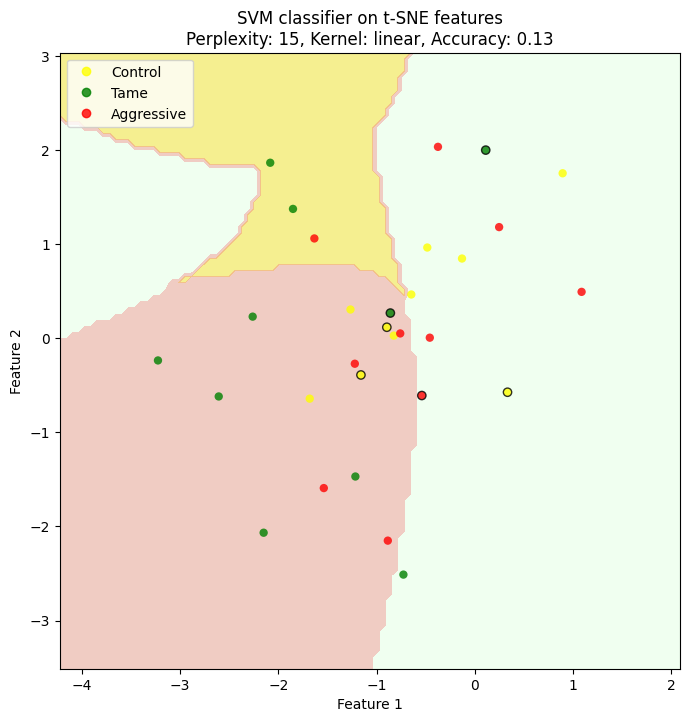

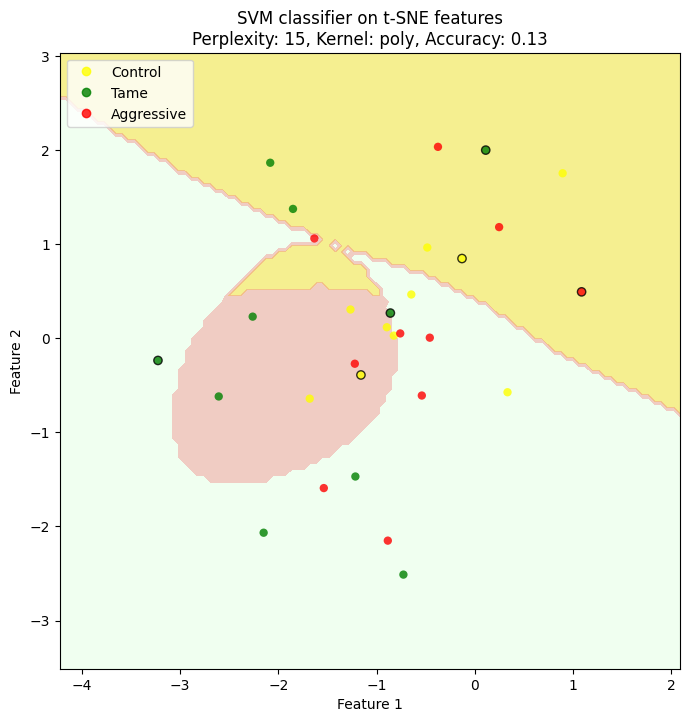

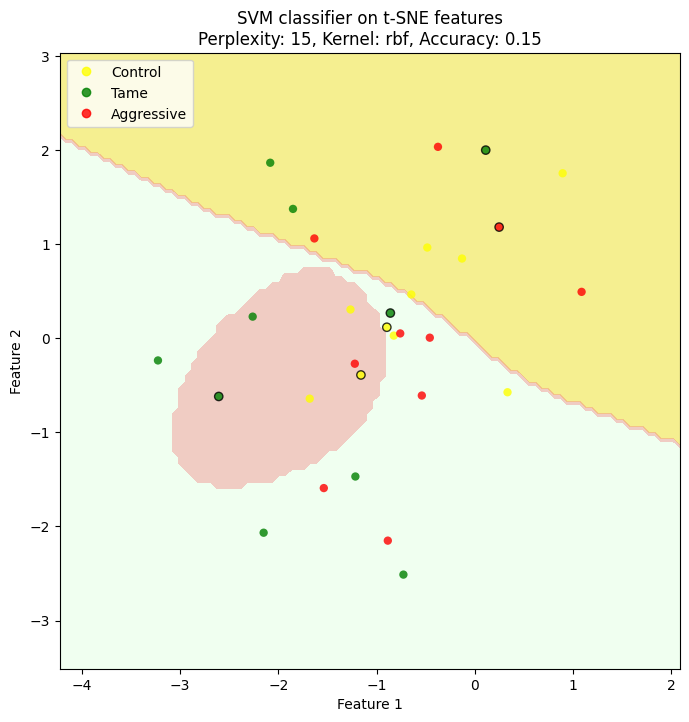

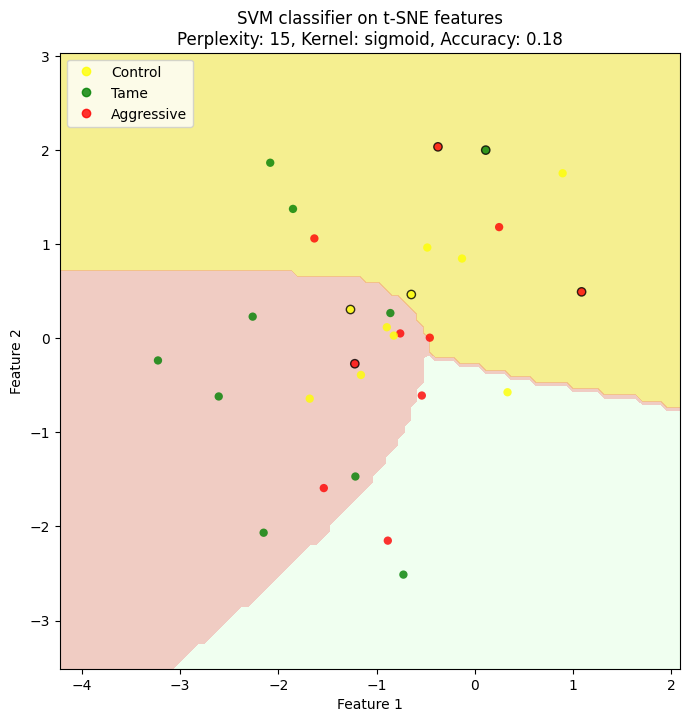

In [8]:
######## t-SNE Data to 2D to Visualize SVM #########

# Define colors for each class
colors = ['yellow', 'green', 'red']
class_labels = ['Control', 'Tame', 'Aggressive']

# Define perplexity and kernel values to loop over
perplexities = [5, 10, 15]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Loop over different perplexity and kernel values
for perplexity in perplexities:
    singleplot = 1
    for kernel in kernels:
        # Perform t-SNE
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state = 1)
        X_2d = tsne.fit_transform(feature_vectors)
        
        # Print results for each kernel
        print(f'Kernel: {kernel}')
        print(f'Perplexity: {perplexity}')

        for i in range(num_iterations):
        
            # Split data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X_2d, labels, test_size=0.2)

            # Fit model and make predictions
            svm.fit(X_train, y_train)
            y_pred = svm.predict(X_test)

            # Calculate metrics and store in results array
            results[i][0] = accuracy_score(y_train, svm.predict(X_train))
            results[i][1] = accuracy_score(y_test, y_pred)
            
        print(f'Mean:      {np.mean(results[:, 0]):<10.3f} {np.mean(results[:, 1]):<10.3f}')    
        print('-------------------------------------------------------')

        # Plot decision boundary and scatter plot
        xx, yy = np.meshgrid(np.linspace(X_2d[:, 0].min()-1, X_2d[:, 0].max()+1, 100),
                             np.linspace(X_2d[:, 1].min()-1, X_2d[:, 1].max()+1, 100))
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8, 8))
        plt.gca().set_facecolor('honeydew') # set background color
        plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['forestgreen','gold','lightblue','lightcoral','gray']), levels=[-1,0,1])
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('SVM classifier on t-SNE features\nPerplexity: {}, Kernel: {}, Accuracy: {:.2f}'.format(perplexity, kernel, np.mean(results[:, 1])))

        scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(colors), alpha=0.8, edgecolors='none')
        scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(colors), alpha=0.8, edgecolors='k')
        
        handles_train, labels_train = scatter_train.legend_elements()
        handles_test, labels_test = scatter_test.legend_elements()
        plt.legend(handles_train + handles_test, class_labels, loc='upper left')

        # Save figure to file
        plt.savefig('ODataNoRFE_perp{}_kernel{}.png'.format(perplexity, kernel))